In [1]:
!pip install tensorflow==2.15.0

In [2]:
!pip install keras

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
#import cv2 as cv
import warnings
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow import keras

2025-01-21 15:33:56.395243: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-21 15:33:56.452910: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 15:33:56.452935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 15:33:56.457223: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 15:33:56.471295: I tensorflow/core/platform/cpu_feature_guar

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
print(tf.__version__)

2.15.0


In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


2025-01-21 15:34:04.033185: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-21 15:34:04.034152: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-21 15:34:04.078322: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [ ]:
# Extract dataset .zip (Run only once)
!unzip -o -q Dataset.zip  -d Dataset

In [8]:
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, Dense
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.models import Model
from keras.utils import get_source_inputs
from keras.utils import get_file
from tensorflow.python.keras.utils import layer_utils

In [9]:
IMG_SHAPE = (224, 224, 3)
model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              alpha=0.35,
                                              weights=None,
                                              include_top=True,
                                              classes=7,
                                              classifier_activation="softmax"
                                              )

base_learning_rate = 0.001

2025-01-21 15:34:10.206162: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-21 15:34:10.207329: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-21 15:34:10.208366: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
model.summary()

Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 16)         432       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 16)         64        ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 16)         0         ['bn_Conv1[

In [1]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
aiohappyeyeballs             2.4.2
aiohttp                      3.10.8
aiosignal                    1.3.1
amqp                         5.2.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
Babel                        2.14.0
beautifulsoup4               4.12.2
billiard                     4.2.0
bleach                       6.1.0
cachetools                   5.3.3
celery                       5.3.6
certifi                      2023.11.17
cffi                         1.16.0
chardet                      5.2.0
charset-normalizer           3.3.2
click                        8.1.7
click-didyoumean             0.3.1

In [11]:
def mob_pre_data(i_tensor):
    return (i_tensor / 255).astype(np.float32)

PATH = "Dataset_compressed"
print("path: ", PATH)
BATCH_SIZE = 64
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(rescale = 1./ 255,
                                   validation_split=0.20)

train_ds = train_datagen.flow_from_directory(PATH,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             color_mode="rgb",
                                             shuffle=True,
                                             subset='training',
                                             seed=42,
                                             classes=['Clear', 'SlantingHeavyRain', 'VerticalHeavyRain',
                                                      'SlantingMediumRain', 'VerticalMediumRain', 'SlantingLowRain',
                                                      'VerticalLowRain'])

val_ds = train_datagen.flow_from_directory(PATH,
                                           target_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           class_mode="categorical",
                                           color_mode="rgb",
                                           shuffle=True,
                                           seed=42,
                                           subset="validation",
                                           classes=['Clear', 'SlantingHeavyRain', 'VerticalHeavyRain',
                                                    'SlantingMediumRain', 'VerticalMediumRain', 'SlantingLowRain',
                                                    'VerticalLowRain'])

print(train_ds.class_indices)
print(val_ds.class_indices)

path:  Dataset_compressed
Found 267731 images belonging to 7 classes.
Found 66929 images belonging to 7 classes.
{'Clear': 0, 'SlantingHeavyRain': 1, 'VerticalHeavyRain': 2, 'SlantingMediumRain': 3, 'VerticalMediumRain': 4, 'SlantingLowRain': 5, 'VerticalLowRain': 6}
{'Clear': 0, 'SlantingHeavyRain': 1, 'VerticalHeavyRain': 2, 'SlantingMediumRain': 3, 'VerticalMediumRain': 4, 'SlantingLowRain': 5, 'VerticalLowRain': 6}


In [12]:
starter_learning_rate = 0.1
end_learning_rate = 0.001
decay_steps = 10000
learning_rate_fn = keras.optimizers.schedules.PolynomialDecay(
    starter_learning_rate,
    decay_steps,
    end_learning_rate,
    power=0.5)

In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate_fn),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

2024-05-22 16:28:04.931389: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [14]:
class EarlyStoppingByAccuracy(Callback):
    def __init__(self, monitor='val_accuracy', value=0.995, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True


callbacks_1 = [
    EarlyStoppingByAccuracy(monitor='val_accuracy', value=0.995, verbose=1),
]

In [ ]:
from os import listdir, remove
from PIL import Image

path = "Dataset_compressed/VerticalLowRain/"
for filename in listdir(path):
    if filename.endswith('.jpg'):
        try:
            img = Image.open(path+filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError) as e:
            print('Bad file:', filename)
            #print('Removing file ...')
            #remove(path+filename)

In [15]:
!nvidia-smi

Wed May 22 16:28:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:01:00.0 Off |                  Off |
|  0%   49C    P2              57W / 450W |  22683MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
print("Start training ...")
history = model.fit(train_ds,
                    initial_epoch=0,
                    epochs=100,
                    validation_data=val_ds,
                    callbacks=callbacks_1)

Start training ...
Epoch 1/100


2024-05-22 16:28:35.745851: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-22 16:28:35.816175: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-22 16:28:36.334222: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0e6cf34c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-22 16:28:36.334239: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-05-22 16:28:36.334242: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 4090, Compute Capability 8.9
I0000 00:00:1716388116.366192 2752184 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4184/4184 [==============================] - 372s 88ms/step - loss: 0.2471 - accuracy: 0.9103 - val_loss: 2.5723 - val_accuracy: 0.3755
Epoch 2/100
4184/4184 [==============================] - 365s 87ms/step - loss: 0.0482 - accuracy: 0.9824 - val_loss: 0.4226 - val_accuracy: 0.8935
Epoch 3/100
4184/4184 [==============================] - 357s 85ms/step - loss: 0.0205 - accuracy: 0.9926 - val_loss: 0.5058 - val_accuracy: 0.9004
Epoch 4/100
4184/4184 [==============================] - 351s 84ms/step - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.5069 - val_accuracy: 0.9014
Epoch 5/100
4184/4184 [==============================] - 360s 86ms/step - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.5068 - val_accuracy: 0.9019
Epoch 6/100
4184/4184 [==============================] - 363s 87ms/step - loss: 0.0150 - accuracy: 0.9947 - val_loss: 0.5123 - val_accuracy: 0.9019
Epoch 7/100
4184/4184 [==============================] - 361s 86ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.5164

Plotting history ...


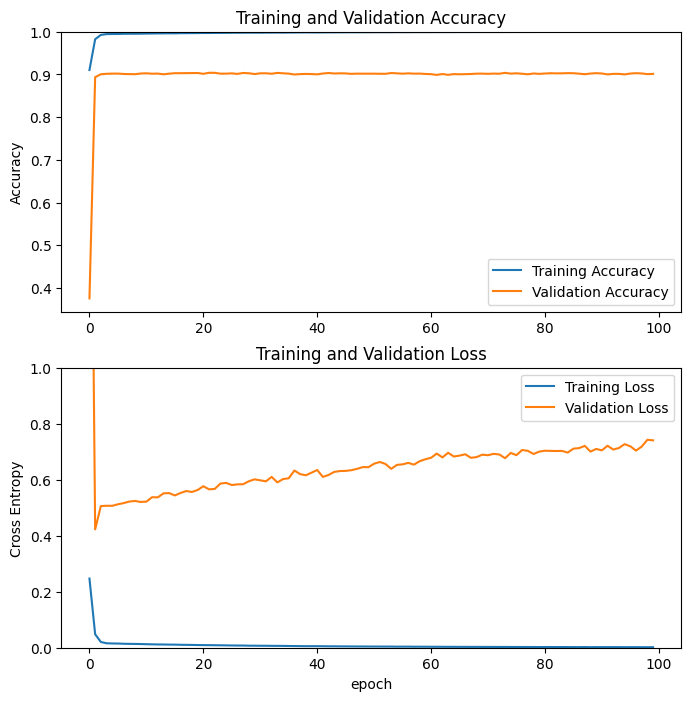

Model test ...
1046/1046 [==============================] - 73s 69ms/step - loss: 0.7408 - accuracy: 0.9013
Test accuracy : 0.901268482208252


In [18]:
print("Plotting history ...")

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8)) 
plt.subplot(2, 1, 1) 
plt.plot(acc, label='Training Accuracy') 
plt.plot(val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()), 1]) 
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2) 
plt.plot(loss, label='Training Loss') 
plt.plot(val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.ylabel('Cross Entropy') 
plt.ylim([0, 1.0]) 
plt.title('Training and Validation Loss') 
plt.xlabel('epoch') 
plt.show()

print("Model test ...") 
loss, accuracy = model.evaluate(val_ds) 
print('Test accuracy :', accuracy)

class_names = ['Clear', 'SlantingHeavyRain', 'VerticalHeavyRain', 'SlantingMediumRain', 'VerticalMediumRain', 'SlantingLowRain', 'VerticalLowRain']

In [19]:
# Retrieve a batch of images from the test set
image_batch, label_batch = next(val_ds)
predictions = model.predict(image_batch)
predictions = np.argmax(predictions, 1)

# Apply a sigmoid since our model returns logits

predictions = tf.where(predictions < 0.5, 0, 1)
label_batch = np.argmax(label_batch, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

2/2 [==============================] - 0s 5ms/step
Predictions:
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0]
Labels:
 [4 1 2 5 1 5 1 3 0 5 3 1 3 1 3 0 0 4 4 6 4 2 6 0 5 1 0 4 6 3 2 6 3 5 5 5 6
 1 6 6 6 0 3 1 4 1 1 3 6 3 1 4 0 1 3 6 3 4 0 3 4 3 0 0]


2/2 [==============================] - 0s 28ms/step


ModuleNotFoundError: No module named 'seaborn'

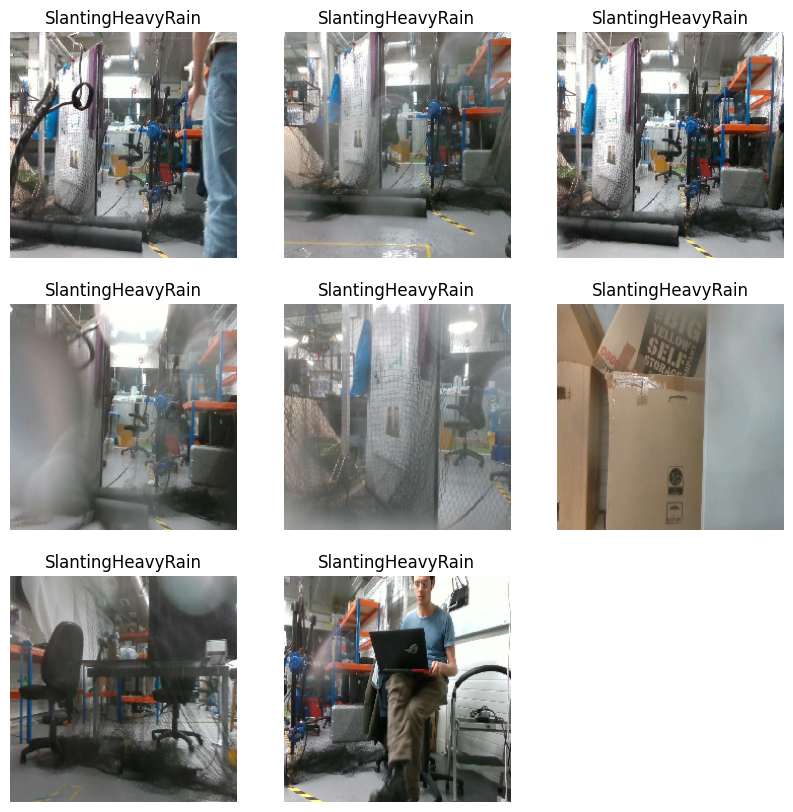

In [20]:
class_names = ['Clear', 'SlantingHeavyRain', 'VerticalHeavyRain', 'SlantingMediumRain', 'VerticalMediumRain', 'SlantingLowRain', 'VerticalLowRain']
plt.figure(figsize=(10, 10))
for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i])
    plt.title(class_names[predictions[i]])
    plt.axis("off")

predictions = np.array([])
labels = np.array([])
for im in range(len(val_ds)):
    x, y = val_ds[im]
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=1)])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])

tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=['Clear', 'SlantingHeavyRain', 'VerticalHeavyRain',
                                        'SlantingMediumRain', 'VerticalMediumRain', 'SlantingLowRain',
                                        'VerticalLowRain'],
            yticklabels=['Clear', 'SlantingHeavyRain', 'VerticalHeavyRain',
                        'SlantingMediumRain', 'VerticalMediumRain', 'SlantingLowRain',
                        'VerticalLowRain'],
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [21]:
# Confution Matrix and Classification Report

print('Confusion Matrix')
print(confusion_matrix(labels, predictions))
print('Classification Report')
target_names = ['Clear', 'SlantingHeavyRain', 'VerticalHeavyRain',
                'SlantingMediumRain', 'VerticalMediumRain', 'SlantingLowRain',
                'VerticalLowRain']
print(classification_report(labels, predictions, target_names=target_names))

Confusion Matrix
[[10809     7     2     4    62    10    42]
 [    2  9291    16     5    14     4     0]
 [    0     0  6890     1    55     3   137]
 [    5    29  1525  8140    44   171   114]
 [   41    11     5     3  9985    52   102]
 [    8     1    42    87   113  9055   324]
 [   25    48   300     9  2949   236  6151]]
Classification Report
                    precision    recall  f1-score   support

             Clear       0.99      0.99      0.99     10936
 SlantingHeavyRain       0.99      1.00      0.99      9332
 VerticalHeavyRain       0.78      0.97      0.87      7086
SlantingMediumRain       0.99      0.81      0.89     10028
VerticalMediumRain       0.76      0.98      0.85     10199
   SlantingLowRain       0.95      0.94      0.95      9630
   VerticalLowRain       0.90      0.63      0.74      9718

          accuracy                           0.90     66929
         macro avg       0.91      0.90      0.90     66929
      weighted avg       0.91      0.90    

In [22]:
filepath = "MobileNetV2.new2"
tf.keras.models.save_model(model, filepath, include_optimizer=True)
keras_file = filepath
print('Saved baseline model to:', keras_file)

INFO:tensorflow:Assets written to: MobileNetV2.new2/assets


INFO:tensorflow:Assets written to: MobileNetV2.new2/assets


Saved baseline model to: MobileNetV2.new2


In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open('TFliteMobileNetV2.new2/model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp5fin4mb8/assets


INFO:tensorflow:Assets written to: /tmp/tmp5fin4mb8/assets
2024-05-23 12:05:46.259248: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-05-23 12:05:46.259267: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-05-23 12:05:46.259508: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp5fin4mb8
2024-05-23 12:05:46.273225: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-23 12:05:46.273238: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp5fin4mb8
2024-05-23 12:05:46.301700: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-05-23 12:05:46.312447: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-05-23 12:05:46.622423: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

In [24]:
model.save("MobileNetSmallV2.new2.keras")

In [25]:
print(history.history)

{'loss': [0.24705572426319122, 0.04815439134836197, 0.02048524282872677, 0.015888959169387817, 0.01521503645926714, 0.014980649575591087, 0.014166814275085926, 0.013777283020317554, 0.01350509375333786, 0.01316398661583662, 0.012540546245872974, 0.01210332103073597, 0.011683107353746891, 0.011531480588018894, 0.011117847636342049, 0.011058942414820194, 0.010512183420360088, 0.010250355117022991, 0.010023646056652069, 0.009594505652785301, 0.009312314912676811, 0.009186032228171825, 0.008942465297877789, 0.008616622537374496, 0.008385403081774712, 0.008025441318750381, 0.007885200902819633, 0.007791060488671064, 0.007263225968927145, 0.007231945171952248, 0.00704240845516324, 0.006959088612347841, 0.006709824316203594, 0.006594958249479532, 0.006518590729683638, 0.006204191129654646, 0.006013683043420315, 0.005709734279662371, 0.0054743182845413685, 0.0055776028893888, 0.0055525898933410645, 0.005316810216754675, 0.005050998646765947, 0.0050382851622998714, 0.004772258456796408, 0.00478

In [34]:
last_conv_layer_name = "Conv_1"
classifier_layer_names = [
    "global_average_pooling2d"]

In [35]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 224x224
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (224, 224, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 160, 160, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

1/1 [==============================] - 0s 11ms/step
[[0. 0. 0. 0. 0. 1. 0.]]


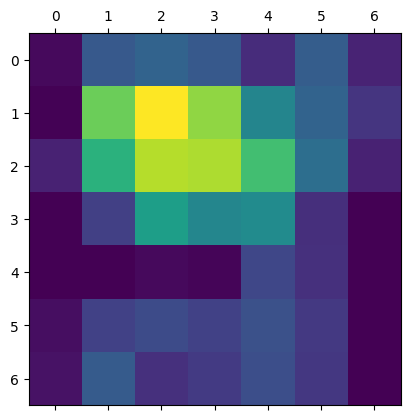

In [40]:
img_path = 'Dataset_compressed/SlantingLowRain/img100.jpg'
img_array =  mob_pre_data(get_img_array(img_path, size=IMG_SHAPE))

# Print what the top predicted class is
preds = model.predict(img_array)
print(np.round(preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()